<a href="https://colab.research.google.com/github/piyushy1/Gradientor/blob/main/Drichlet_Distribution/drichlet_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drichlet Distribution

In [1]:
# Import libs
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

In [2]:
# Plot the samples on a 2D simplex (triangular plot)
# For more on triangular/simplex and barycentric plots-
# https://en.wikipedia.org/wiki/Ternary_plot

def plot_simplex(samples):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Convert to barycentric coordinates for plotting
    x = samples[:, 0] + 0.5 * samples[:, 1]
    y = np.sqrt(3) / 2 * samples[:, 1]

    ax.scatter(x, y, alpha=0.1, edgecolor='k')
    ax.set_title('Samples from Dirichlet Distribution')
    plt.show()

# **Uniform Distribution**
 When α =1:  All combinations are equally likely.


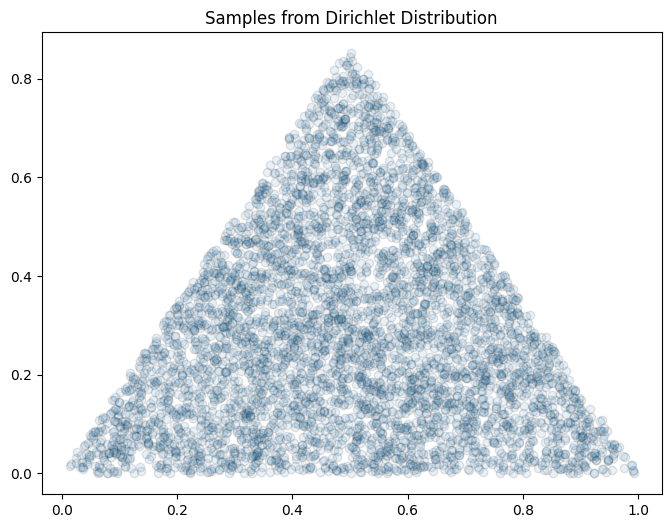

In [3]:


# Parameters for Dirichlet distribution
alpha = [1, 1, 1]

# Generate samples
samples_uniform = dirichlet.rvs(alpha, size=5000)

plot_simplex(samples_uniform)

All combinations are equally likely. This is called a uniform distribution, meaning each possible probability scenario (like [0.3,.0.,0.4] or [0.5,0.2, 0.3] ) is equally likely. Think of it as having no prior bias toward any specific way of distributing probabilities. Basically you have no preference for how the votes are split. Any division is equally acceptable. Thats the plot shows a dense scatter across the entire simplex (triangle). There is no bias toward any specific outcome.

# **Balanced Distribution**

When α >1: All combinations are equally likely.

Larger α​ values (all equal) favor more balanced distributions near the center of the simplex.
For Example: Think of distributing votes among candidates where you expect relatively even support among them, though not perfectly strict

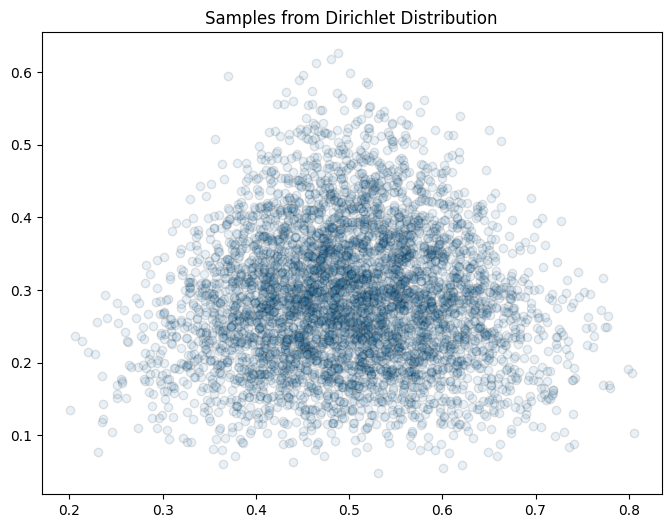

In [16]:
# Parameters for Dirichlet distribution
alpha = [6, 6, 6]

# Generate samples
samples_balanced = dirichlet.rvs(alpha, size=5000)

plot_simplex(samples_balanced)

Probabilities are more evenly distributed and cluster around the center of the triangle ([0.33,0.33,0.33]).
The samples favor balanced scenarios where categories share probabilities evenly.

# **Skewed Distributio**n

Smaller values of α ​<1 favor extreme outcomes. One category tends to dominate, while others shrink toward zero.
Example: In elections, perhaps one candidate might unexpectedly take the majority of votes.

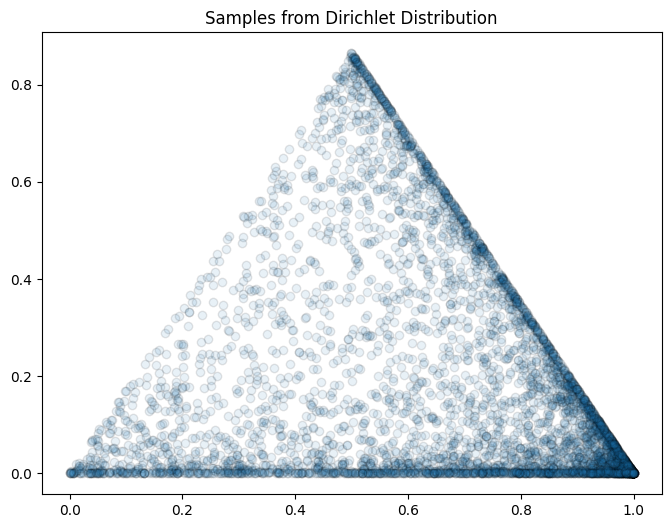

In [17]:
# Parameters for Dirichlet distribution
alpha = [0.8, 0.3, 0.3]

# Generate samples
samples_skewed = dirichlet.rvs(alpha, size=5000)

plot_simplex(samples_skewed)

The distribution favors extreme points. You can see more samples near the vertices of the triangle, indicating that one category dominates while the others receive very little.

# Why this is happening???

Dirichlet samples are derived by generating Gamma-distributed random variables and normalizing them.

Basically-

*   Larger α values produce Gamma samples with less variance and values clustered near the center.
*   Smaller α values result in more extreme values.

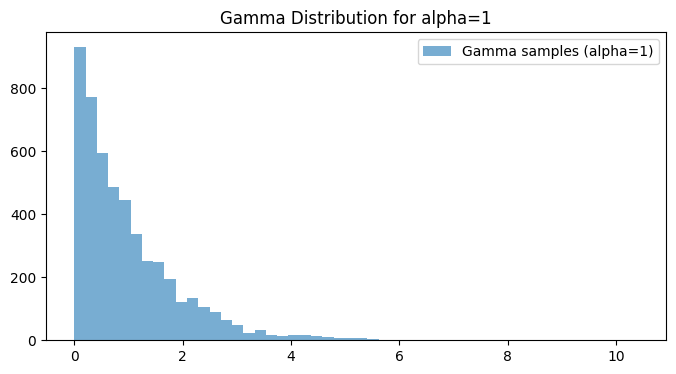

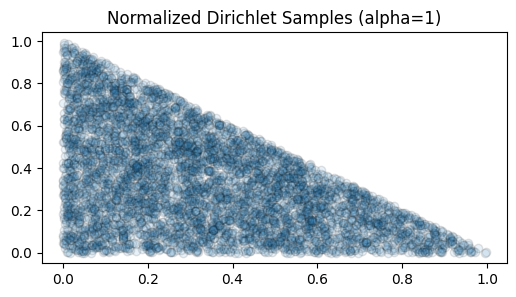

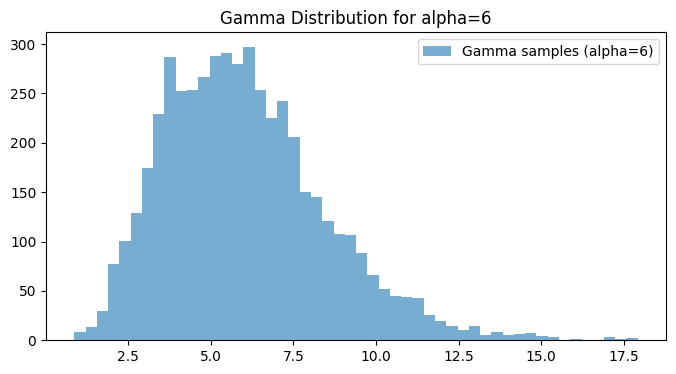

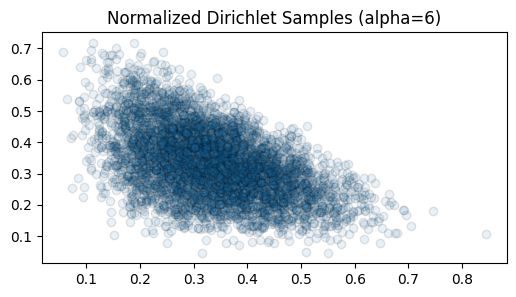

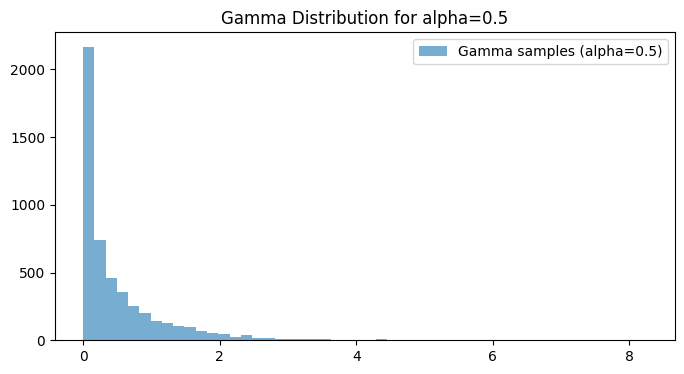

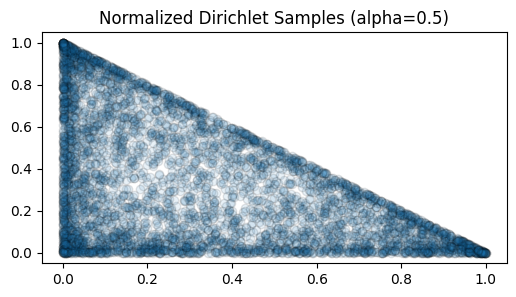

In [19]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

def plot_gamma_samples(alpha_value, size=5000):
    # Generate Gamma samples for three categories
    y1 = gamma.rvs(alpha_value, size=size)
    y2 = gamma.rvs(alpha_value, size=size)
    y3 = gamma.rvs(alpha_value, size=size)

    # Normalize them to sum to 1 (Dirichlet transformation )
    total = y1 + y2 + y3
    x1 = y1 / total
    x2 = y2 / total
    x3 = y3 / total

    # Plot the Gamma samples before normalization
    plt.figure(figsize=(8, 4))
    plt.hist(y1, bins=50, alpha=0.6, label=f'Gamma samples (alpha={alpha_value})')
    plt.legend()
    plt.title(f'Gamma Distribution for alpha={alpha_value}')
    plt.show()

    # Plot normalized Dirichlet samples
    plt.figure(figsize=(6, 3))
    plt.scatter(x1, x2, alpha=0.1, edgecolor='k')
    plt.title(f'Normalized Dirichlet Samples (alpha={alpha_value})')
    plt.show()

# Visualizing Gamma and Dirichlet samples for alpha values
plot_gamma_samples(1)  # Uniform
plot_gamma_samples(6)  # Balanced
plot_gamma_samples(0.5)  # Skewed


# Gamma Distribution for α=1 (Uniform)

  The Gamma samples are broadly distributed across different values.After normalization, the points scatter uniformly across the entire simplex.

#Gamma Distribution for α=6 (Balanced)

    The Gamma samples are tightly clustered, leading to balanced and less variable probabilities.
    After normalization, the points tend to cluster near the center.

# Gamma Distribution for α=0.5 (Skewed)

    The Gamma samples are concentrated near small values, often close to zero.
    After normalization, the points scatter near the simplex vertices, indicating one dominant category.

 Gamma distribution defines the "weight" each category gets. By dividing by the total weight, itsd creates probability values for each category.

    α>1: Produces more balanced weights, favoring smoother, less extreme probabilities.
    α<1: Produces spiky, peaky weights, where some categories get much more weight than others.


# Side by Side Plotting of above Gamma Codes

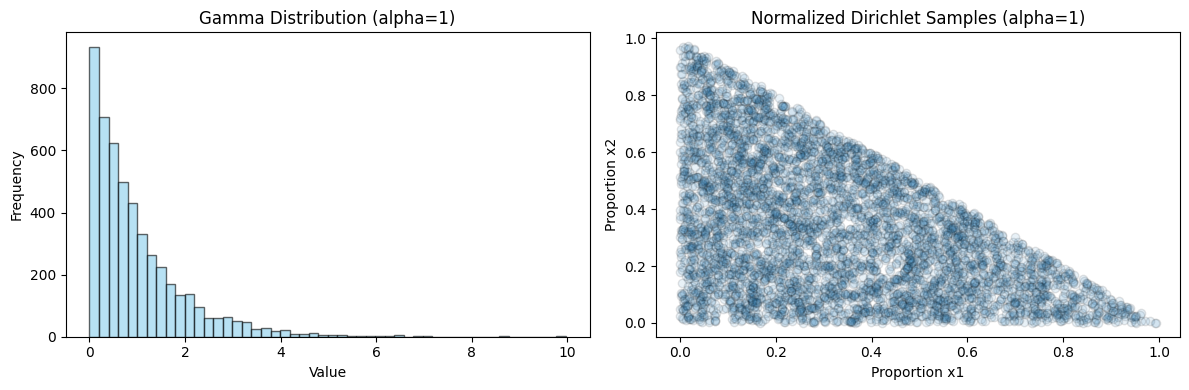

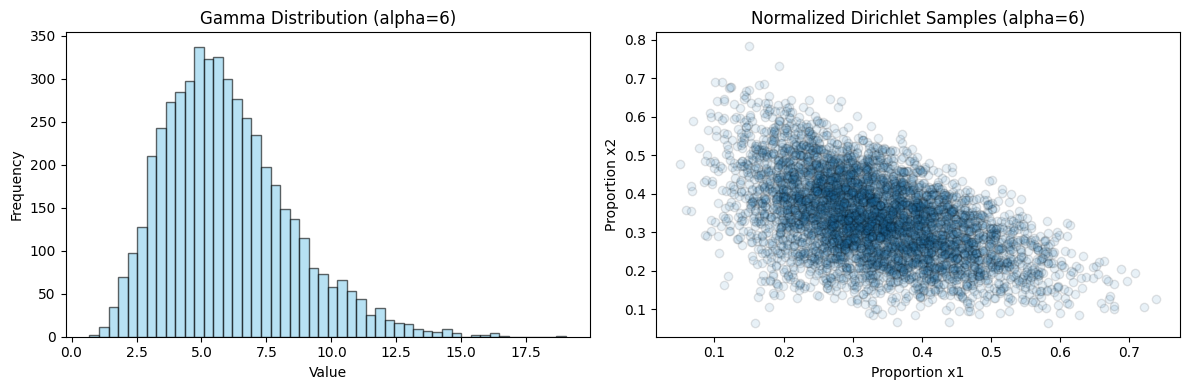

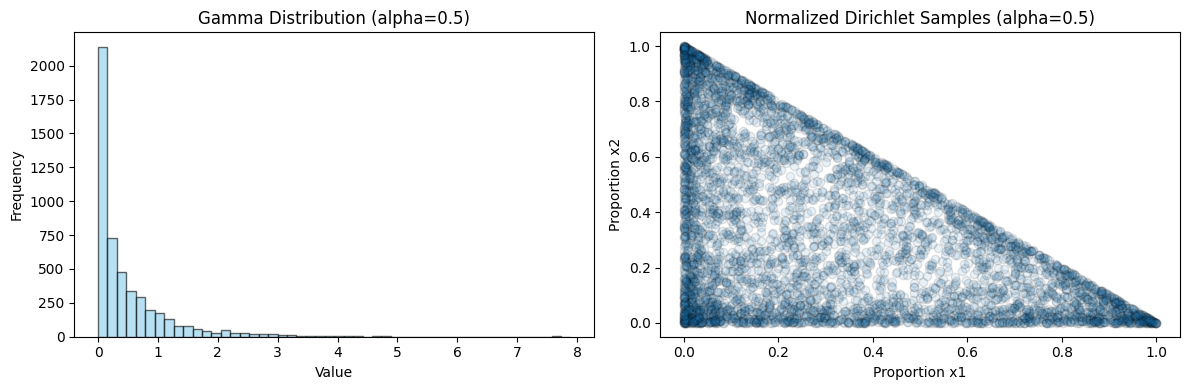

In [20]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

def plot_gamma_and_dirichlet_samples(alpha_value, size=5000):
    # Generate Gamma samples for three categories
    y1 = gamma.rvs(alpha_value, size=size)
    y2 = gamma.rvs(alpha_value, size=size)
    y3 = gamma.rvs(alpha_value, size=size)

    # Normalize them to sum to 1 (Dirichlet transformation)
    total = y1 + y2 + y3
    x1 = y1 / total
    x2 = y2 / total
    x3 = y3 / total

    #side-by-side layout
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Gamma distribution histogram
    axes[0].hist(y1, bins=50, alpha=0.6, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Gamma Distribution (alpha={alpha_value})')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')

    # Normalized Dirichlet samples scatter plot
    axes[1].scatter(x1, x2, alpha=0.1, edgecolor='k')
    axes[1].set_title(f'Normalized Dirichlet Samples (alpha={alpha_value})')
    axes[1].set_xlabel('Proportion x1')
    axes[1].set_ylabel('Proportion x2')

    plt.tight_layout()
    plt.show()

# Visualizing Gamma and Dirichlet samples for different alpha values
plot_gamma_and_dirichlet_samples(1)  # Uniform
plot_gamma_and_dirichlet_samples(6)  # Balanced
plot_gamma_and_dirichlet_samples(0.5)  # Skewed
